<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/Criptocurrency-Market-Value/blob/main/criptocurrency_Market_values_and_supply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install opendatasets --quiet

In [3]:

import opendatasets as od

In [4]:
dataset="https://www.kaggle.com/datasets/thedevastator/cryptocurrency-market-values-and-supply"

In [5]:
data=od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alrafiaurnob
Your Kaggle Key: ··········


100%|██████████| 12.4k/12.4k [00:00<00:00, 4.43MB/s]

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
raw_df=pd.read_csv("/content/cryptocurrency-market-values-and-supply/top cryto2.csv")

In [8]:
raw_df

,Unnamed: 0,Name,Market_cap,price,circulating_supply,symbol,Date
0,0,Bitcoin,3.852083e+11,20127.14,"19,138,750",BTC,01 September 2022
1,1,Ethereum,1.938345e+11,1586.18,"122,202,301",ETH,01 September 2022
2,2,Tether,6.755111e+10,1.00,"67,550,404,113",USDT,01 September 2022
3,3,USD Coin,5.202630e+10,1.00,"52,027,528,034",USDC,01 September 2022
4,4,BNB,4.491907e+10,278.42,"161,337,261",BNB,01 September 2022
...,...,...,...,...,...,...,...
595,595,Avalanche,5.089442e+09,17.20,"295,963,244",AVAX,30 September 2022
596,596,Uniswap,4.916393e+09,6.45,"762,209,327",UNI,30 September 2022
597,597,Wrapped Bitcoin,4.756996e+09,19427.69,"244,856",WBTC,30 September 2022
598,598,UNUS SED LEO,3.996808e+09,4.19,"953,954,130",LEO,30 September 2022


Analysing the data

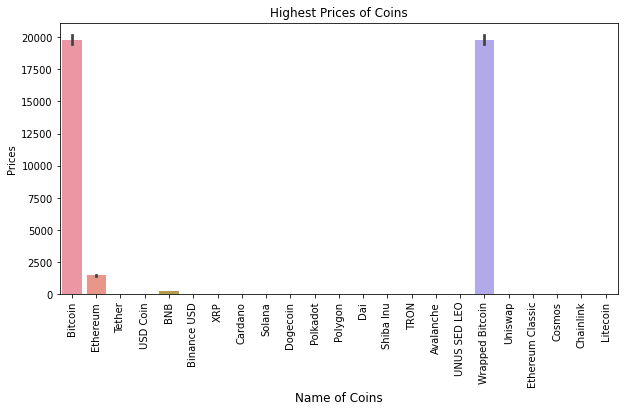

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x=raw_df['Name'], y=raw_df['price'].values,data=raw_df)
plt.title('Highest Prices of Coins')
plt.ylabel('Prices')
plt.xlabel('Name of Coins', fontsize=12)
plt.xticks(rotation=90)
plt.show()

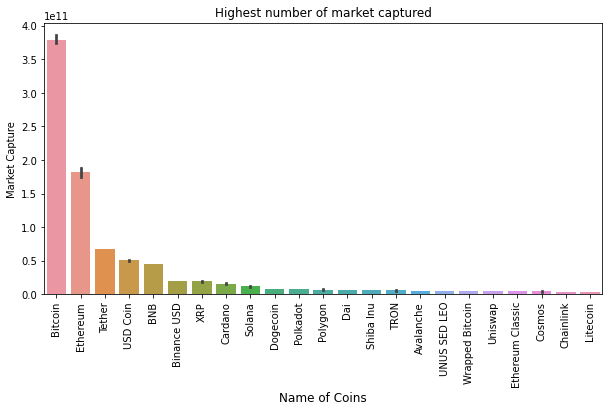

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x=raw_df['Name'], y=raw_df['Market_cap'].values)
plt.title('Highest number of market captured')
plt.ylabel('Market Capture')
plt.xlabel('Name of Coins', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Preprocessing the data

In [11]:
raw_df['Date']=pd.to_datetime(raw_df['Date'])
raw_df['Date'] = raw_df['Date'].dt.strftime('%d/%m/%Y')


In [12]:
raw_df["Day"]=pd.to_datetime(raw_df.Date,format="%d/%m/%Y").dt.day
raw_df["Month"]=pd.to_datetime(raw_df.Date,format="%d/%m/%Y").dt.month
raw_df["Year"]=pd.to_datetime(raw_df.Date,format="%d/%m/%Y").dt.year

In [13]:
raw_df.head()

,Unnamed: 0,Name,Market_cap,price,circulating_supply,symbol,Date,Day,Month,Year
0,0,Bitcoin,3.852083e+11,20127.14,"19,138,750",BTC,01/09/2022,1,9,2022
1,1,Ethereum,1.938345e+11,1586.18,"122,202,301",ETH,01/09/2022,1,9,2022
2,2,Tether,6.755111e+10,1.00,"67,550,404,113",USDT,01/09/2022,1,9,2022
3,3,USD Coin,5.202630e+10,1.00,"52,027,528,034",USDC,01/09/2022,1,9,2022
4,4,BNB,4.491907e+10,278.42,"161,337,261",BNB,01/09/2022,1,9,2022


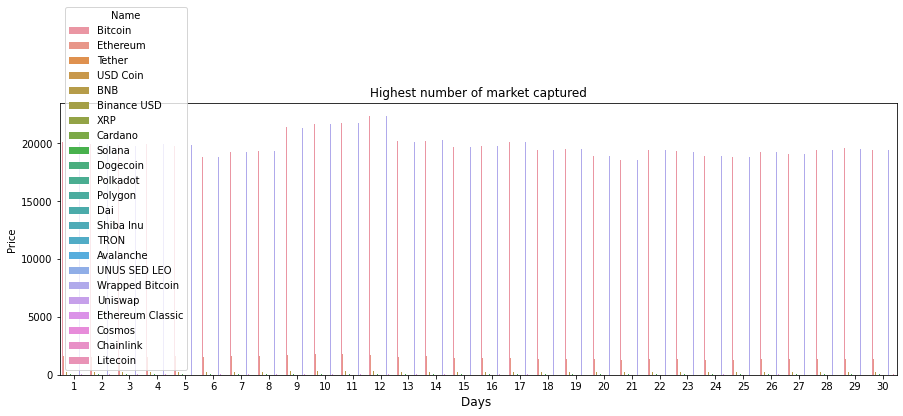

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=raw_df['Day'],y=raw_df['price'],hue=raw_df['Name'])
plt.title('Highest number of market captured')
plt.ylabel('Price')
plt.xlabel('Days ', fontsize=12)
plt.show()

In [15]:
format_number = lambda x: '{:.2f}'.format(float(x))
raw_df['Market_cap']=raw_df['Market_cap'].apply(format_number).astype(float)
raw_df['price']=raw_df['price'].apply(format_number).astype(float)

In [16]:
raw_df['circulating_supply'] = raw_df['circulating_supply'].str.replace(',', '')

In [17]:
raw_df=raw_df.drop(['Unnamed: 0','symbol','Date','Month','Year'],axis=1)

In [18]:

raw_df.head()

,Name,Market_cap,price,circulating_supply,Day
0,Bitcoin,3.852083e+11,20127.14,19138750,1
1,Ethereum,1.938345e+11,1586.18,122202301,1
2,Tether,6.755111e+10,1.00,67550404113,1
3,USD Coin,5.202630e+10,1.00,52027528034,1
4,BNB,4.491907e+10,278.42,161337261,1


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
raw_df['Name'] = le.fit_transform(raw_df['Name'])
raw_df['Name']

0       3
1       9
2      17
3      19
4       1
       ..
595     0
596    20
597    21
598    18
599    11
Name: Name, Length: 600, dtype: int64

In [20]:
raw_df

,Name,Market_cap,price,circulating_supply,Day
0,3,3.852083e+11,20127.14,19138750,1
1,9,1.938345e+11,1586.18,122202301,1
2,17,6.755111e+10,1.00,67550404113,1
3,19,5.202630e+10,1.00,52027528034,1
4,1,4.491907e+10,278.42,161337261,1
...,...,...,...,...,...
595,0,5.089442e+09,17.20,295963244,30
596,20,4.916393e+09,6.45,762209327,30
597,21,4.756996e+09,19427.69,244856,30
598,18,3.996808e+09,4.19,953954130,30


In [21]:
raw_df['Name'].unique()

array([ 3,  9, 17, 19,  1,  2, 22,  4, 15,  8, 12, 13,  7, 14, 16,  0, 18,
       21, 20, 10,  6,  5, 11])

## Checking the correlation

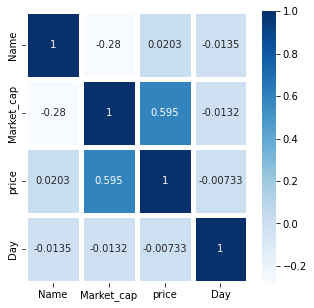

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(raw_df.corr(),annot=True, fmt='.3g',linewidths=5, cmap='Blues')
plt.show()


#### We can see that the positive and negative co-relation is very low among the features . So we dont need to select the features.

## Spliting the data 

In [23]:
x=raw_df.drop("price",axis=1)
y=raw_df['price']

In [24]:
x.shape,y.shape

((600, 4), (600,))

In [25]:

from sklearn.model_selection import train_test_split

In [26]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape ,y_train.shape

((480, 4), (480,))

In [28]:
x_test.shape,y_test.shape

((120, 4), (120,))

In [29]:
x_train

,Name,Market_cap,circulating_supply,Day
145,2,1.991227e+10,19914503967,8
9,8,8.274910e+09,132670764300,1
375,0,5.117882e+09,295750682,19
523,19,4.921228e+10,49206247660,27
188,15,1.240387e+10,353117653,10
...,...,...,...,...
71,13,7.763820e+09,8682124704,4
106,22,1.599648e+10,49646492379,6
270,12,8.046880e+09,1117131532,14
435,0,5.234078e+09,295863660,22


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  confusion_matrix, accuracy_score,mean_squared_error,classification_report
import sklearn.metrics
lr=LinearRegression().fit(x_train,y_train)
y_pred=lr.predict(x_test)
pd.DataFrame(np.c_[y_test, y_pred, y_test], columns=['Actual', 'Predicted', 'y-test'])



,Actual,Predicted,y-test
0,6.88,663.125145,6.88
1,13.46,-582.444404,13.46
2,0.49,3174.437214,0.49
3,19961.09,2145.857126,19961.09
4,1776.20,9483.532223,1776.20
...,...,...,...
115,13.93,-575.983537,13.93
116,19419.51,15317.844426,19419.51
117,33.61,1383.793954,33.61
118,0.06,1271.768247,0.06


In [31]:
lr_train = lr.score(x_train,y_train)*100
lr_test = lr.score(x_test, y_test)*100
print('Testing Accuracy  :',round(lr_test,2),"%")
print('Training Accuracy :',round(lr_train,2),"%")

Testing Accuracy  : 38.94 %
Training Accuracy : 39.26 %


In [32]:
mse = mean_squared_error(y_test, y_pred,squared=False)
print("Mean squared error: ", mse)

Mean squared error:  4200.500221317582


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Instantiate the model with 100 decision trees
rf = RandomForestRegressor(random_state = 42)

# Define the range of n_estimators to test
param_grid = {'n_estimators': [10,20,30,40,50, 100, 150]}

# Use GridSearchCV to find the best value of n_estimators
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best value of n_estimators and the corresponding mean cross-validated score
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best score:", grid_search.best_score_)


# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(x_test)


# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred,squared=False)
print("Mean Squared Error:", mse)


Best n_estimators: 50
Best score: 0.9996779786632741
Mean Squared Error: 4200.500221317582


In [38]:
rf_train = rf.score(x_train,y_train)*100
rf_test = rf.score(x_test, y_test)*100
print('Testing Accuracy  :',(rf_test),"%")
print('Training Accuracy :',(rf_train),"%")





Testing Accuracy  : 99.96144249901529 %
Training Accuracy : 99.99604099306363 %


In [39]:
pd.DataFrame(np.c_[y_test, y_pred_rf, y_test], columns=['Actual', 'Predicted', 'y-test'])

,Actual,Predicted,y-test
0,6.88,7.1216,6.88
1,13.46,14.3285,13.46
2,0.49,0.4795,0.49
3,19961.09,19843.6948,19961.09
4,1776.20,1735.3575,1776.20
...,...,...,...
115,13.93,14.4430,13.93
116,19419.51,20130.2908,19419.51
117,33.61,34.0826,33.61
118,0.06,0.0600,0.06


In [40]:
from sklearn.linear_model import Ridge

In [41]:
ridge = Ridge(alpha=0.5).fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("Mean Squared Error:", mse)

Mean Squared Error: 4200.4996519150245


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.88002e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [42]:
ridge_train = ridge.score(x_train,y_train)*100
ridge_test = ridge.score(x_test, y_test)*100
print('Testing Accuracy  :',round(ridge_test,2),"%")
print('Training Accuracy :',round(ridge_train,2),"%")

Testing Accuracy  : 38.94 %
Training Accuracy : 39.26 %


In [43]:
pd.DataFrame(np.c_[y_test, y_pred_ridge, y_test], columns=['Actual', 'Predicted', 'y-test'])

,Actual,Predicted,y-test
0,6.88,663.125945,6.88
1,13.46,-582.416634,13.46
2,0.49,3174.395258,0.49
3,19961.09,2145.819625,19961.09
4,1776.20,9483.526145,1776.20
...,...,...,...
115,13.93,-575.955845,13.93
116,19419.51,15317.849767,19419.51
117,33.61,1383.781678,33.61
118,0.06,1271.753427,0.06
